<a href="https://colab.research.google.com/github/hai1862003/AttendanceData/blob/main/Snack_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SNACK DATA


In [1]:
#import statement
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [28]:
#read data
df_data = pd.read_excel('/content/Data/F2023 SNACK Attendance Sheet.xlsx')



#drop NAN Columns
df_data =df_data.drop(['Name', 'Question'], axis =1)
# df_data.loc(df_data['Start time'].hour() == '01')


#replace Student Name and Student Number column with dummy data
dummy_array = []
for i in range(len(df_data)):
  dummy_array.append(np.random.choice(['John Doe', 'Jane Doe', 'Larry', 'Jack']))

for column in ['Student Name', 'Student Number (9 digit number)']:
  df_data[column] = dummy_array

df_data

,ID,Start time,Completion time,Email,Student Name,Student Number (9 digit number),Course/Topic discussed,Your name,How did the student Join?,Date,Time (eg. 2:45 pm)
0,119,2023-10-11 13:45:08,2023-10-11 13:45:41,anonymous,Jane Doe,Jane Doe,ITEC2620,Telmuun,Online,2023-10-11,1pm
1,140,2023-10-17 17:25:37,2023-10-17 17:26:31,anonymous,Jane Doe,Jane Doe,1540,Maney,Person,2023-10-17,5:30pm
2,147,2023-10-18 13:04:13,2023-10-18 13:05:00,anonymous,Jane Doe,Jane Doe,1540,Maney,Person,2023-10-18,1:00pm
3,156,2023-10-18 16:43:29,2023-10-18 17:05:53,anonymous,Larry,Larry,1540,Mark,Person,2023-10-18,04:40:00
4,186,2023-10-23 17:41:44,2023-10-23 17:42:37,anonymous,Larry,Larry,2300,Mark,Person,2023-10-23,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...
412,413,2023-12-14 15:00:31,2023-12-14 15:01:28,anonymous,Jack,Jack,ADMS 2500,Hai,Person,2023-12-14,15:00:00
413,414,2023-12-15 10:42:10,2023-12-15 10:42:42,anonymous,Jane Doe,Jane Doe,Econ 1530,Maney,Person,2023-12-15,10:45am
414,415,2023-12-15 14:03:31,2023-12-15 14:04:45,anonymous,John Doe,John Doe,Adms 2510,Maney,Online,2023-12-15,2:00pm
415,416,2023-12-15 17:09:27,2023-12-15 17:09:57,anonymous,Jane Doe,Jane Doe,Econ 2300,Maney,Person,2023-12-15,5:10pm


# DATA CLEANING






In [30]:
#checking nAN values
df_data.isna().any()

#drop nAN vlaues in Student number columns (no student num = no count)
df_data = df_data.dropna(subset = ['Student Number (9 digit number)'])

#check back
df_data['Student Number (9 digit number)'].isna().any()

df_data.isna().any()


ID                                 False
Start time                         False
Completion time                    False
Email                              False
Student Name                       False
Student Number (9 digit number)    False
Course/Topic discussed              True
Your name                           True
How did the student Join?           True
Date                                True
Time (eg. 2:45 pm)                  True
dtype: bool

In [31]:
#Adding a 'course_type' column like (ADMS, ECON, ITEC )
unique_course = df_data['Course/Topic discussed'].unique()

#create empty 1d-array with len = len of course column
new_list = np.empty([0,len(df_data['Course/Topic discussed'])])
# for each entry in course_topic discussed:
for _ in df_data['Course/Topic discussed']:
  #remove whitespeace
  course_type = str(_).replace(" ", "")
  if len(course_type) >= 4:
    #get first 4 character
    course_type = course_type[0:4]
    #make all upper case
    course_type = course_type.upper()
    if course_type == 'ASDM':
      course_type = 'ADMS'
    if course_type  not in  ['ADMS', 'ITEC', 'MATH', 'ECON']:
      #turns to 'STATS/Math inquiries'
      course_type = 'STATS/MATH General'
  new_list =np.append(arr = new_list, values = course_type)
#check for unique value in  list
set(new_list)


#add 'course_type' to df
df_data['Course_type'] = new_list

df_data

,ID,Start time,Completion time,Email,Student Name,Student Number (9 digit number),Course/Topic discussed,Your name,How did the student Join?,Date,Time (eg. 2:45 pm),Course_type
0,119,2023-10-11 13:45:08,2023-10-11 13:45:41,anonymous,Jane Doe,Jane Doe,ITEC2620,Telmuun,Online,2023-10-11,1pm,ITEC
1,140,2023-10-17 17:25:37,2023-10-17 17:26:31,anonymous,Jane Doe,Jane Doe,1540,Maney,Person,2023-10-17,5:30pm,STATS/MATH General
2,147,2023-10-18 13:04:13,2023-10-18 13:05:00,anonymous,Jane Doe,Jane Doe,1540,Maney,Person,2023-10-18,1:00pm,STATS/MATH General
3,156,2023-10-18 16:43:29,2023-10-18 17:05:53,anonymous,Larry,Larry,1540,Mark,Person,2023-10-18,04:40:00,STATS/MATH General
4,186,2023-10-23 17:41:44,2023-10-23 17:42:37,anonymous,Larry,Larry,2300,Mark,Person,2023-10-23,17:40:00,STATS/MATH General
...,...,...,...,...,...,...,...,...,...,...,...,...
412,413,2023-12-14 15:00:31,2023-12-14 15:01:28,anonymous,Jack,Jack,ADMS 2500,Hai,Person,2023-12-14,15:00:00,ADMS
413,414,2023-12-15 10:42:10,2023-12-15 10:42:42,anonymous,Jane Doe,Jane Doe,Econ 1530,Maney,Person,2023-12-15,10:45am,ECON
414,415,2023-12-15 14:03:31,2023-12-15 14:04:45,anonymous,John Doe,John Doe,Adms 2510,Maney,Online,2023-12-15,2:00pm,ADMS
415,416,2023-12-15 17:09:27,2023-12-15 17:09:57,anonymous,Jane Doe,Jane Doe,Econ 2300,Maney,Person,2023-12-15,5:10pm,ECON


# Course Type Distribution All Students

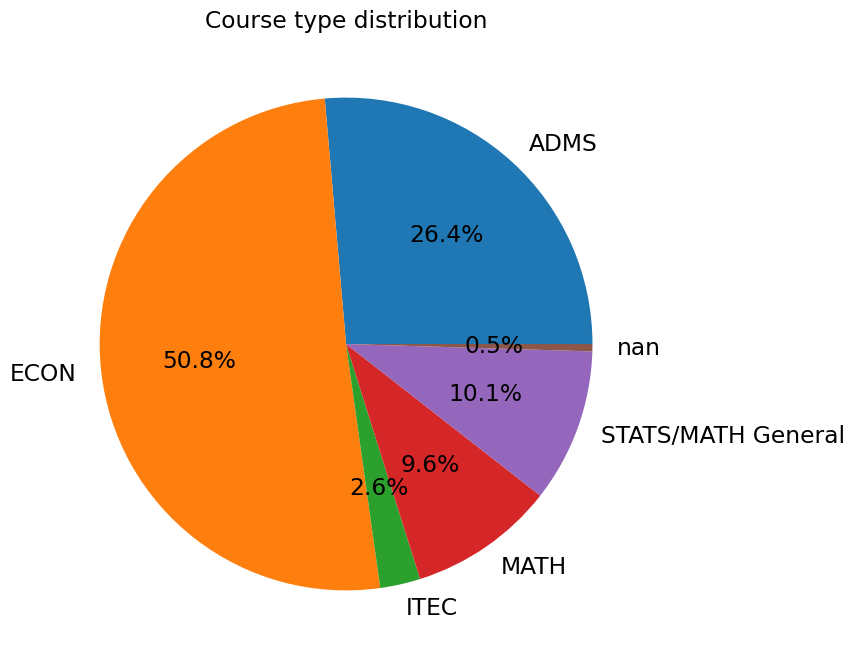

In [32]:
#distribution of course-type
course_type_dist = df_data.groupby('Course_type').agg({'Course_type': pd.Series.count})



#draw pie chart
fig, ax = plt.subplots(figsize = (14,8))

ax.pie(data = course_type_dist,
       x = 'Course_type',
       labels = course_type_dist.index,
       autopct='%1.1f%%',
       textprops={'size': 'large'})
#set titles

ax.set(title = 'Course type distribution')

plt.show()

In [ ]:
#check datattypes
df_data.dtypes

ID                                          int64
Start time                         datetime64[ns]
Completion time                    datetime64[ns]
Email                                      object
Student Name                               object
Student Number (9 digit number)            object
Course/Topic discussed                     object
Your name                                  object
How did the student Join?                  object
Date                               datetime64[ns]
Time (eg. 2:45 pm)                         object
Course_type                                object
dtype: object

# Number Of Visits By The Hour

What's the distribution of vistis by hour like? When do student usually come?

In [10]:
#check distribution of arrival time for student


#strfttime to hours
time_arrive = df_data['Start time'].dt.strftime('%H')
#make into df
time_arrive = pd.DataFrame({'time_arrive': time_arrive})

#drop value = 1AM in time_arrive df
#get index of  row =1AM
index_1AM = time_arrive.index[time_arrive['time_arrive'] == '01'].to_list()
#drop those value
time_arrive = time_arrive.drop(labels = index_1AM, axis = 0)

#sorthours
time_arrive = time_arrive.sort_values('time_arrive')


#check for values = 1AM?
time_arrive


,time_arrive
206,10
106,10
95,10
202,10
29,10
...,...
232,17
370,17
416,17
265,18


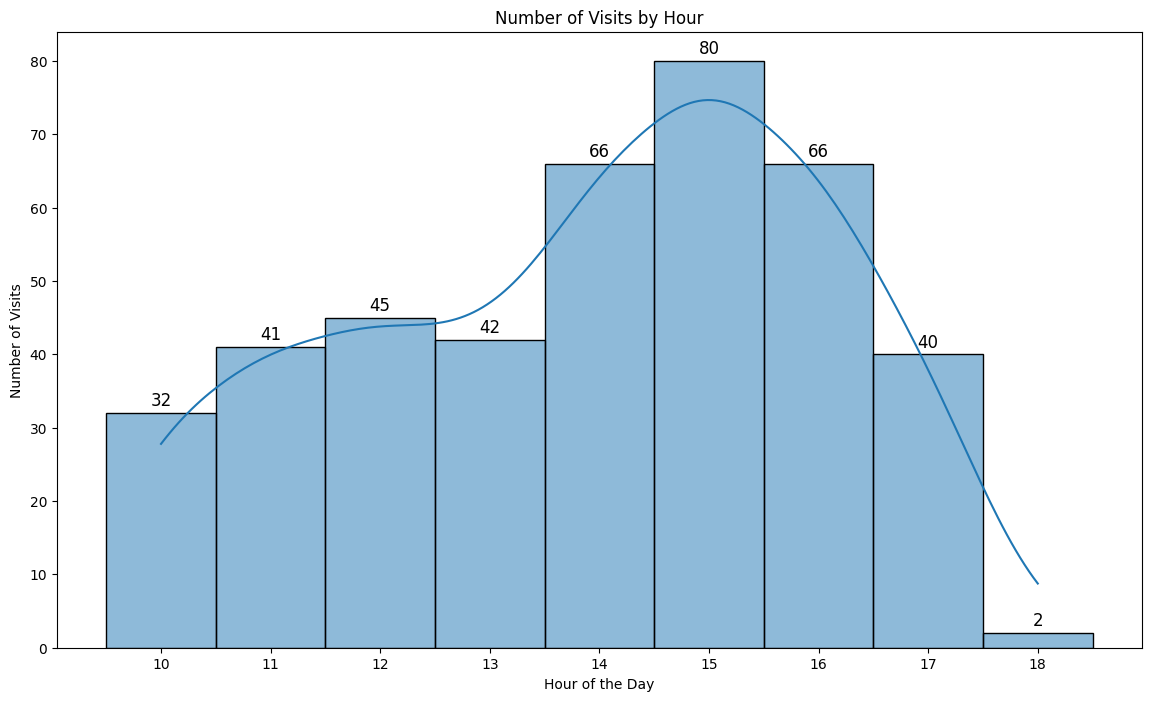

In [11]:
fig, ax = plt.subplots(figsize = (14,8))

ax = sns.histplot(data= time_arrive, x = 'time_arrive', kde = True)


ax.set(xlabel = 'Hour of the Day',
       ylabel = 'Number of Visits',
       title = 'Number of Visits by Hour',
       )
#update all fontsize
plt.rcParams.update({'font.size': 14})
#label data for graphs
for p in ax.patches:
 height = p.get_height() # get the height of each bar
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+1, # y-coordinate position of data label, padded 5 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', # sets horizontal alignment (ha) to center
 size = 12) #size of fonts

plt.show()



Hours seems widely distributed, hotzone 14 => 17. But starting at 10 does not seems that bad.

# Online vs in Person

Whats the distribution? Does it change through time?

In [12]:
#create data that seperate by Time and the count of Online and Offline

visit_method_by_time =df_data.groupby('Date')['How did the student Join?'].value_counts().unstack() #unstack to make into df
#drop 0 values

#replace NA values
visit_method_by_time =visit_method_by_time.fillna(0)
#range index
visit_method_by_time.reset_index(inplace= True)
#sort by time
visit_method_by_time.sort_values('Date', inplace = True)

#smooth out data
visit_method_by_time = visit_method_by_time.rolling(5, on = 'Date').mean()


visit_method_by_time

How did the student Join?,Date,Online,Person
0,2023-09-25,NaN,NaN
1,2023-09-26,NaN,NaN
2,2023-09-27,NaN,NaN
3,2023-09-28,NaN,NaN
4,2023-09-29,1.8,7.4
5,2023-10-02,2.2,6.4
6,2023-10-03,2.6,6.0
7,2023-10-04,2.6,4.8
8,2023-10-05,2.0,5.2
9,2023-10-06,2.0,5.0


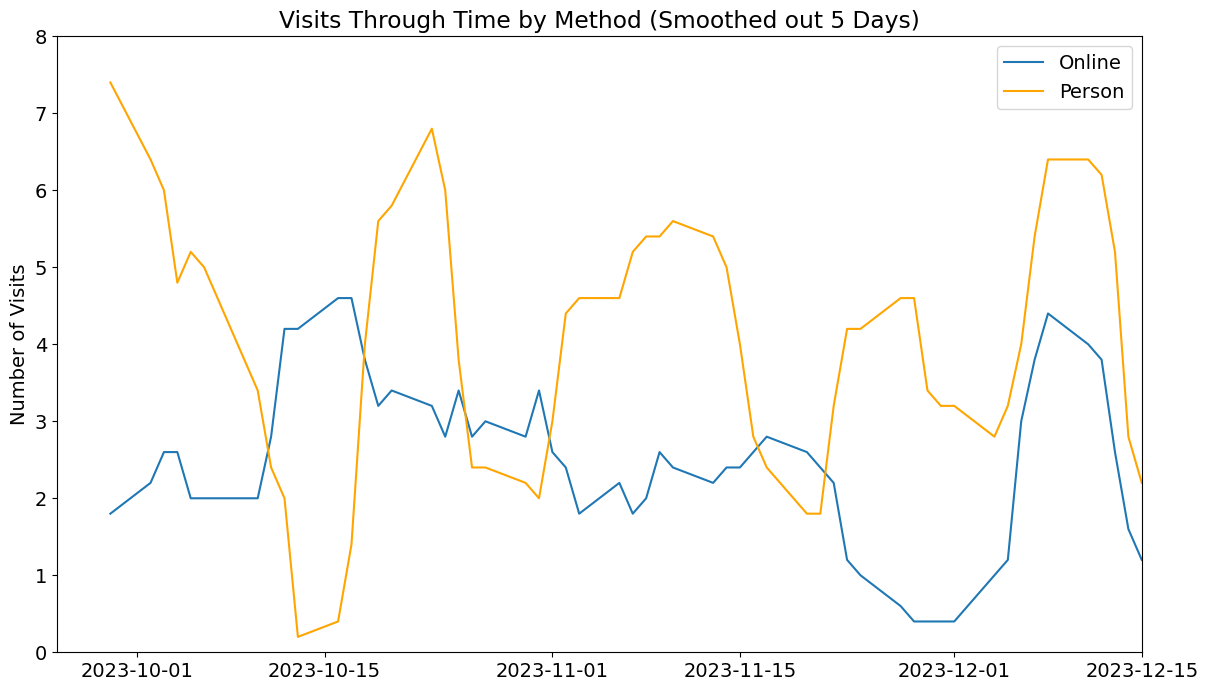

In [13]:
#draw multiple line graphs

fig, ax = plt.subplots(figsize = (14,8))
#line 1
ax.plot(visit_method_by_time['Date'],
        visit_method_by_time['Online'],
      )

#line 2
ax.plot(visit_method_by_time['Date'],
         visit_method_by_time['Person'],
          color = 'orange')
# legend
ax.legend(['Online', 'Person'])
#set titles
ax.set(title = 'Visits Through Time by Method (Smoothed out 5 Days)',
       ylim = (0,8),
       xlim = (visit_method_by_time['Date'].min(), visit_method_by_time['Date'].max()),
       ylabel = 'Number of Visits',
      )



plt.show()


'Should we do only in-person SNACK in some cases?' No, almost all the time online is better than in-person

# Student comes before 12:
- How did they come (online vs in person)?
- What courses type did they come for (ADMS, ECON, ITEC)?


In [14]:
#subset: student comes before 12
early_student = df_data[pd.to_numeric(df_data['Start time'].dt.strftime('%H')) <= 12] #return rows with startime hour <=12

early_student = early_student.rename({'How did the student Join?': 'Visit_Method'}, axis = 1)


#group student by online or in person
early_student_visit_method = early_student.groupby('Visit_Method').agg({'Visit_Method': pd.Series.count})
early_student_visit_method

,Visit_Method
Visit_Method,
Online,55
Person,53


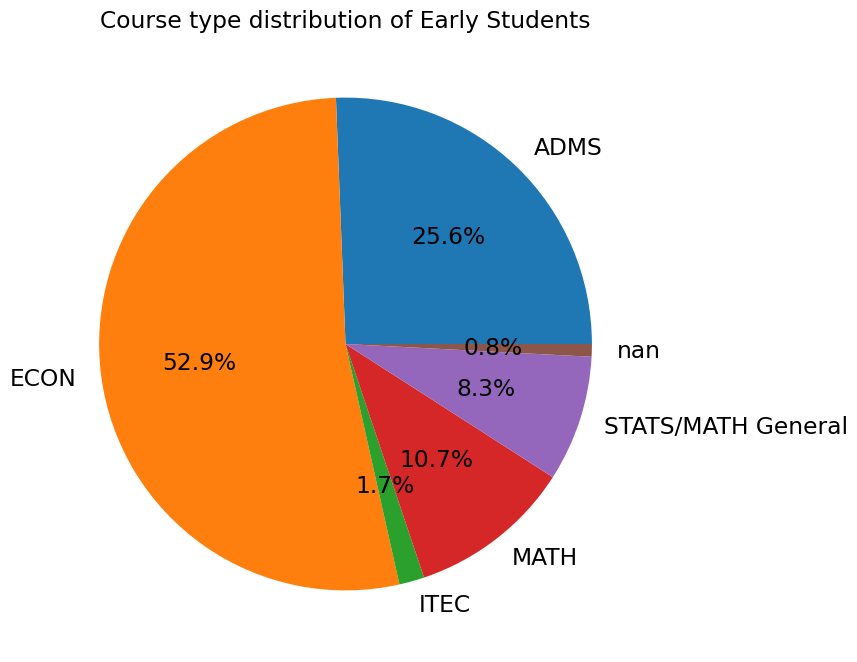

In [16]:
#course_type for early students
early_student_course = early_student.groupby('Course_type').agg({'Course_type': pd.Series.count})

#draw pie chart
fig, ax = plt.subplots(figsize = (14,8))

ax.pie(data = early_student_course,
       x = 'Course_type',
       labels = early_student_course.index,
       autopct='%1.1f%%',
       textprops={'size': 'large'})
#set titles

ax.set(title = 'Course type distribution of Early Students')

plt.show()

# Arrivals by Days in Week? Divide by Course Type

- Whats the arrival by day in the week? (Mon,Tues,Wed)?
- Color code each day with coursetype?

In [18]:
#create data
#create day of week data
day_of_week = df_data[['Date', 'Course_type','Student Number (9 digit number)']] #student number: a non-nan column to count visists

#set Date column into Day of the week format, Mon,TUes, Fri
day_of_week['Date'] = day_of_week['Date'].dt.strftime('%A')

#create data
day_of_week = day_of_week.groupby(['Date', 'Course_type'], as_index = False).agg({'Student Number (9 digit number)':pd.Series.count})

#Sortvalue of weekday
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

  #make into categorical data to sort
day_of_week['Date'] = pd.Categorical(day_of_week['Date'],categories=weekdays)

day_of_week = day_of_week.sort_values('Date', ascending = True)

day_of_week


<ipython-input-18-fb42a54ed0f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_of_week['Date'] = day_of_week['Date'].dt.strftime('%A')


,Date,Course_type,Student Number (9 digit number)
8,Monday,STATS/MATH General,11
4,Monday,ADMS,23
5,Monday,ECON,19
6,Monday,ITEC,3
7,Monday,MATH,5
9,Monday,nan,1
14,Tuesday,ADMS,11
17,Tuesday,MATH,9
18,Tuesday,STATS/MATH General,1
16,Tuesday,ITEC,1


In [19]:
#Plot Days of weeks and Course

fig = px.bar(data_frame = day_of_week,
             x = 'Date',
             y ='Student Number (9 digit number)',
             color = 'Course_type',
             )
fig.update_layout(title = 'Visits by Days of Week and Course',
                  yaxis_title = 'Number of Visits',
                  xaxis_title ='Days in Week',
                  legend = dict(font = dict(size = 20, color = "black")))

fig.show()

 ==> Wednesday and Thursday are the busiest in general and also for Econ. ADMS is popular in Monday and Thursday

In [20]:
#make into pivot table to draw in matplotlib
pivot = pd.pivot_table(data = day_of_week, index = 'Date', columns = 'Course_type', values = 'Student Number (9 digit number)')

pivot.fillna(0, inplace = True)

pivot

Course_type,ADMS,ECON,ITEC,MATH,STATS/MATH General,nan
Date,,,,,,
Monday,23.0,19.0,3.0,5.0,11.0,1.0
Tuesday,11.0,21.0,1.0,9.0,1.0,0.0
Wednesday,20.0,45.0,6.0,11.0,9.0,1.0
Thursday,37.0,55.0,0.0,10.0,11.0,0.0
Friday,14.0,18.0,0.0,1.0,6.0,0.0


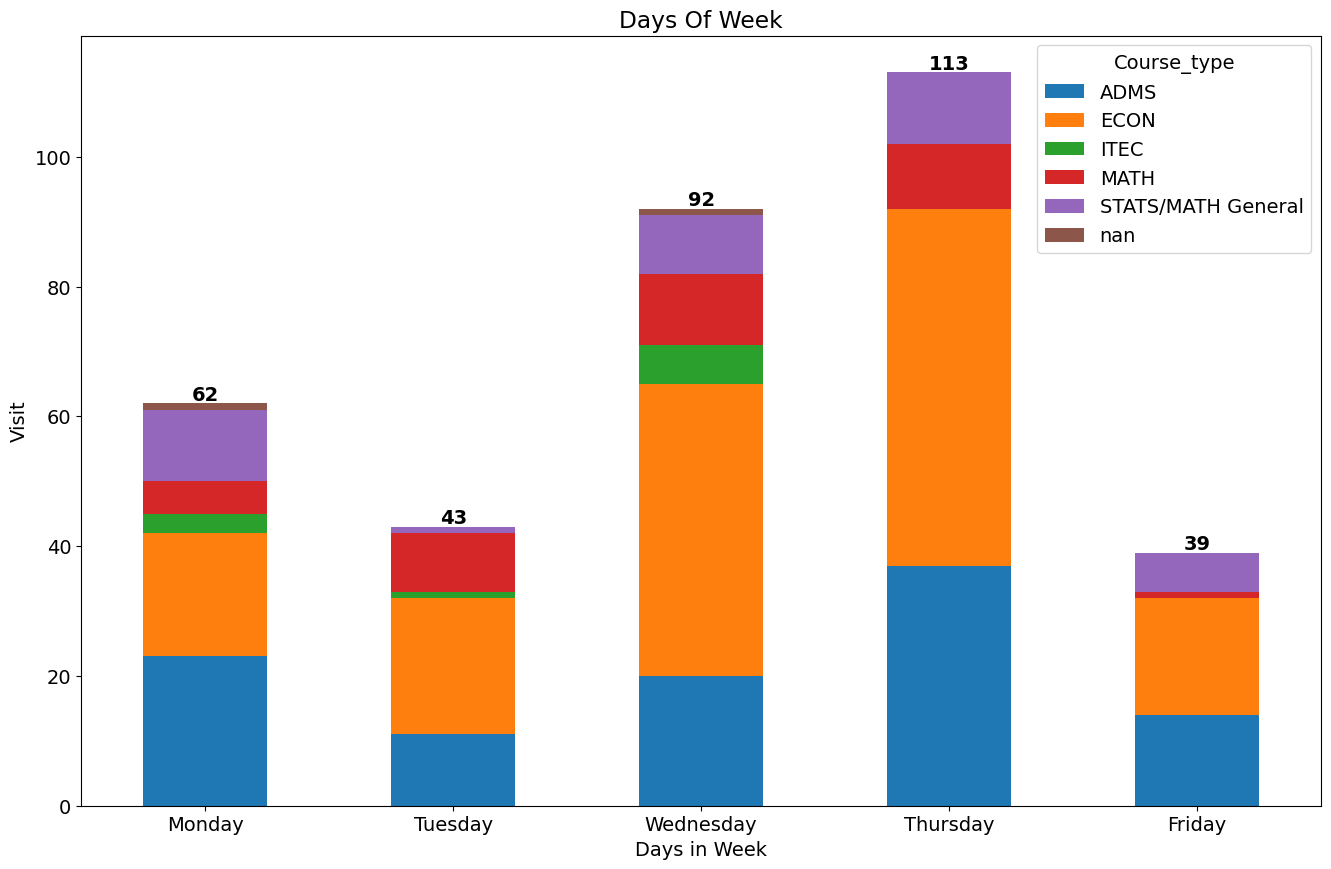

In [21]:
#try plot Days in Week with matplotlib


ax = pivot.plot.bar(stacked=True, figsize = (16,10))

ax.set(title ='Days Of Week',
       ylabel = 'Visit',
       xlabel = 'Days in Week',
       )


#fix rotation of  x_labels
ax.set_xticklabels(pivot.index, rotation=0)

#add total labels

 #create series with day of week and total of vitist each day
totals = pivot.sum(axis=1)
#for each day, and their total
for i, total in enumerate(totals):
  ax.text(x = i, #x = 'Monday', 'Tuesday'
          y = total + 0.5, #y = total visit +0.5 for offset
          s= round(total), #what to show in each bar: round up
          ha ='center', # horizontal alignment
          weight='bold')


plt.show()
#show totals
 #totals